In [62]:
import numpy as np
import contractions
import pandas as pd
from tqdm import tqdm

sim_holder = "../../datasets/VQA/back-translate/sim-result2/rep_{}_{}.npy"
thresh_values = [0.95]
decontract = [True, False]
df = pd.DataFrame(columns=["question_id"])

for th_value in thresh_values:
    for decon in decontract:
        key = f"unique-thresh-{th_value}-decontract-{decon}"

        # add a new column
        df[key] = None

        for split in ["val"]:
            for seq_id in range(1):
                file_path = sim_holder.format(split, seq_id)
                file_data = np.load(file_path, allow_pickle=True).item()

                for qid, value in tqdm(file_data.items()):
                    filtered_questions = []
                    for rep in value["rephrasings_list"]:
                        if rep["sim_score"] > th_value:
                            question = rep["rephrasing"]
                            if decontract:
                                oq = question
                                question = contractions.fix(question)
                            # Todo add preprocessing
                            question.lower()
                            filtered_questions.append(question)

                    if len(df[df['question_id'] == qid]) > 0:
                        df.loc[df["question_id"] == qid, key] = len(set(filtered_questions))
                    else:
                        df = df.append({"question_id": qid, key: len(set(filtered_questions))}, ignore_index=True)



  0%|          | 0/21436 [00:00<?, ?it/s]

  0%|          | 35/21436 [00:00<01:01, 347.75it/s]

  0%|          | 73/21436 [00:00<01:00, 355.92it/s]

  0%|          | 106/21436 [00:00<01:01, 346.55it/s]

  1%|          | 139/21436 [00:00<01:02, 339.74it/s]

  1%|          | 178/21436 [00:00<01:00, 352.73it/s]

  1%|          | 220/21436 [00:00<00:57, 370.50it/s]

  1%|          | 261/21436 [00:00<00:55, 379.40it/s]

  1%|▏         | 300/21436 [00:00<00:55, 380.63it/s]

  2%|▏         | 339/21436 [00:00<00:55, 381.81it/s]

  2%|▏         | 376/21436 [00:01<00:59, 355.73it/s]

  2%|▏         | 412/21436 [00:01<01:00, 349.39it/s]

  2%|▏         | 447/21436 [00:01<01:02, 335.99it/s]

  2%|▏         | 486/21436 [00:01<00:59, 350.24it/s]

  2%|▏         | 525/21436 [00:01<00:58, 360.18it/s]

  3%|▎         | 562/21436 [00:01<01:02, 332.26it/s]

  3%|▎         | 602/21436 [00:01<00:59, 348.36it/s]

  3%|▎         | 641/21436 [00:01<00:57, 358.59it/s]

  3%|▎         | 678/21436 [00:01<00:59

 21%|██        | 4550/21436 [00:14<00:55, 302.99it/s]

 21%|██▏       | 4582/21436 [00:14<00:55, 305.23it/s]

 22%|██▏       | 4615/21436 [00:14<00:53, 311.97it/s]

 22%|██▏       | 4647/21436 [00:14<00:55, 305.22it/s]

 22%|██▏       | 4682/21436 [00:14<00:53, 315.77it/s]

 22%|██▏       | 4717/21436 [00:14<00:51, 322.81it/s]

 22%|██▏       | 4753/21436 [00:15<00:50, 332.45it/s]

 22%|██▏       | 4787/21436 [00:15<00:53, 313.84it/s]

 22%|██▏       | 4822/21436 [00:15<00:51, 322.65it/s]

 23%|██▎       | 4857/21436 [00:15<00:50, 328.79it/s]

 23%|██▎       | 4892/21436 [00:15<00:49, 334.11it/s]

 23%|██▎       | 4926/21436 [00:15<00:51, 322.25it/s]

 23%|██▎       | 4961/21436 [00:15<00:50, 329.44it/s]

 23%|██▎       | 4995/21436 [00:15<00:49, 331.41it/s]

 23%|██▎       | 5029/21436 [00:15<00:51, 317.73it/s]

 24%|██▎       | 5061/21436 [00:15<00:52, 312.76it/s]

 24%|██▍       | 5093/21436 [00:16<00:53, 307.78it/s]

 24%|██▍       | 5124/21436 [00:16<00:54, 300.41it/s]

 24%|██▍  

 40%|████      | 8671/21436 [00:28<00:43, 291.48it/s]

 41%|████      | 8703/21436 [00:28<00:42, 297.94it/s]

 41%|████      | 8735/21436 [00:28<00:41, 302.79it/s]

 41%|████      | 8766/21436 [00:29<00:41, 303.67it/s]

 41%|████      | 8797/21436 [00:29<00:41, 303.32it/s]

 41%|████      | 8828/21436 [00:29<00:41, 301.60it/s]

 41%|████▏     | 8860/21436 [00:29<00:41, 304.68it/s]

 41%|████▏     | 8891/21436 [00:29<00:42, 292.27it/s]

 42%|████▏     | 8921/21436 [00:29<00:45, 277.76it/s]

 42%|████▏     | 8952/21436 [00:29<00:43, 285.67it/s]

 42%|████▏     | 8983/21436 [00:29<00:42, 291.09it/s]

 42%|████▏     | 9013/21436 [00:29<00:45, 274.02it/s]

 42%|████▏     | 9042/21436 [00:30<00:44, 277.71it/s]

 42%|████▏     | 9071/21436 [00:30<00:47, 259.54it/s]

 42%|████▏     | 9100/21436 [00:30<00:46, 265.92it/s]

 43%|████▎     | 9131/21436 [00:30<00:44, 275.55it/s]

 43%|████▎     | 9162/21436 [00:30<00:43, 284.65it/s]

 43%|████▎     | 9191/21436 [00:30<00:44, 278.01it/s]

 43%|████▎

 57%|█████▋    | 12277/21436 [00:43<00:39, 233.78it/s]

 57%|█████▋    | 12309/21436 [00:43<00:35, 253.86it/s]

 58%|█████▊    | 12336/21436 [00:43<00:35, 257.08it/s]

 58%|█████▊    | 12368/21436 [00:43<00:33, 271.92it/s]

 58%|█████▊    | 12396/21436 [00:43<00:34, 259.38it/s]

 58%|█████▊    | 12423/21436 [00:43<00:36, 245.21it/s]

 58%|█████▊    | 12449/21436 [00:43<00:37, 239.12it/s]

 58%|█████▊    | 12475/21436 [00:43<00:36, 243.48it/s]

 58%|█████▊    | 12501/21436 [00:43<00:36, 246.09it/s]

 58%|█████▊    | 12526/21436 [00:43<00:36, 241.64it/s]

 59%|█████▊    | 12555/21436 [00:44<00:35, 250.26it/s]

 59%|█████▊    | 12582/21436 [00:44<00:34, 254.11it/s]

 59%|█████▉    | 12611/21436 [00:44<00:33, 261.54it/s]

 59%|█████▉    | 12638/21436 [00:44<00:35, 249.44it/s]

 59%|█████▉    | 12664/21436 [00:44<00:35, 248.55it/s]

 59%|█████▉    | 12693/21436 [00:44<00:33, 259.50it/s]

 59%|█████▉    | 12724/21436 [00:44<00:32, 271.05it/s]

 59%|█████▉    | 12752/21436 [00:44<00:31, 272.3

 74%|███████▍  | 15886/21436 [00:57<00:22, 241.69it/s]

 74%|███████▍  | 15911/21436 [00:57<00:22, 240.75it/s]

 74%|███████▍  | 15942/21436 [00:57<00:21, 257.31it/s]

 75%|███████▍  | 15973/21436 [00:57<00:20, 269.39it/s]

 75%|███████▍  | 16001/21436 [00:57<00:21, 257.98it/s]

 75%|███████▍  | 16028/21436 [00:57<00:21, 257.03it/s]

 75%|███████▍  | 16054/21436 [00:57<00:21, 252.46it/s]

 75%|███████▌  | 16082/21436 [00:57<00:20, 258.69it/s]

 75%|███████▌  | 16109/21436 [00:58<00:21, 253.11it/s]

 75%|███████▌  | 16135/21436 [00:58<00:20, 254.93it/s]

 75%|███████▌  | 16161/21436 [00:58<00:21, 243.92it/s]

 76%|███████▌  | 16187/21436 [00:58<00:21, 247.28it/s]

 76%|███████▌  | 16212/21436 [00:58<00:21, 245.96it/s]

 76%|███████▌  | 16241/21436 [00:58<00:20, 255.49it/s]

 76%|███████▌  | 16267/21436 [00:58<00:22, 228.49it/s]

 76%|███████▌  | 16295/21436 [00:58<00:21, 240.94it/s]

 76%|███████▌  | 16325/21436 [00:58<00:20, 254.77it/s]

 76%|███████▋  | 16354/21436 [00:59<00:19, 263.2

 90%|█████████ | 19356/21436 [01:11<00:09, 220.84it/s]

 90%|█████████ | 19379/21436 [01:11<00:09, 216.71it/s]

 91%|█████████ | 19401/21436 [01:11<00:09, 216.46it/s]

 91%|█████████ | 19423/21436 [01:11<00:09, 213.60it/s]

 91%|█████████ | 19448/21436 [01:11<00:08, 223.20it/s]

 91%|█████████ | 19473/21436 [01:11<00:08, 230.42it/s]

 91%|█████████ | 19497/21436 [01:12<00:08, 225.60it/s]

 91%|█████████ | 19526/21436 [01:12<00:07, 240.59it/s]

 91%|█████████ | 19551/21436 [01:12<00:07, 239.92it/s]

 91%|█████████▏| 19580/21436 [01:12<00:07, 250.67it/s]

 91%|█████████▏| 19609/21436 [01:12<00:07, 259.02it/s]

 92%|█████████▏| 19636/21436 [01:12<00:07, 237.59it/s]

 92%|█████████▏| 19662/21436 [01:12<00:07, 243.03it/s]

 92%|█████████▏| 19691/21436 [01:12<00:06, 254.68it/s]

 92%|█████████▏| 19717/21436 [01:12<00:06, 254.38it/s]

 92%|█████████▏| 19743/21436 [01:13<00:06, 251.64it/s]

 92%|█████████▏| 19770/21436 [01:13<00:06, 255.61it/s]

 92%|█████████▏| 19796/21436 [01:13<00:06, 247.2

  3%|▎         | 730/21436 [00:04<02:23, 144.64it/s]

  3%|▎         | 746/21436 [00:05<02:19, 148.08it/s]

  4%|▎         | 764/21436 [00:05<02:12, 155.45it/s]

  4%|▎         | 780/21436 [00:05<02:15, 152.95it/s]

  4%|▎         | 796/21436 [00:05<02:15, 152.88it/s]

  4%|▍         | 812/21436 [00:05<02:17, 150.16it/s]

  4%|▍         | 828/21436 [00:05<02:22, 144.98it/s]

  4%|▍         | 843/21436 [00:05<02:27, 139.37it/s]

  4%|▍         | 862/21436 [00:05<02:16, 150.56it/s]

  4%|▍         | 878/21436 [00:05<02:20, 146.11it/s]

  4%|▍         | 894/21436 [00:06<02:18, 148.60it/s]

  4%|▍         | 910/21436 [00:06<02:17, 148.88it/s]

  4%|▍         | 926/21436 [00:06<02:21, 144.64it/s]

  4%|▍         | 942/21436 [00:06<02:19, 147.28it/s]

  4%|▍         | 957/21436 [00:06<02:20, 145.48it/s]

  5%|▍         | 974/21436 [00:06<02:15, 151.25it/s]

  5%|▍         | 990/21436 [00:06<02:14, 151.54it/s]

  5%|▍         | 1006/21436 [00:06<02:16, 149.16it/s]

  5%|▍         | 1021/21436

 14%|█▎        | 2936/21436 [00:19<02:10, 141.33it/s]

 14%|█▍        | 2951/21436 [00:19<02:12, 139.96it/s]

 14%|█▍        | 2966/21436 [00:19<02:13, 137.94it/s]

 14%|█▍        | 2983/21436 [00:19<02:06, 145.34it/s]

 14%|█▍        | 2998/21436 [00:19<02:06, 146.19it/s]

 14%|█▍        | 3015/21436 [00:20<02:04, 147.50it/s]

 14%|█▍        | 3030/21436 [00:20<02:06, 145.38it/s]

 14%|█▍        | 3045/21436 [00:20<02:09, 141.63it/s]

 14%|█▍        | 3060/21436 [00:20<02:08, 143.55it/s]

 14%|█▍        | 3075/21436 [00:20<02:10, 140.79it/s]

 14%|█▍        | 3092/21436 [00:20<02:05, 146.42it/s]

 14%|█▍        | 3107/21436 [00:20<02:10, 140.60it/s]

 15%|█▍        | 3122/21436 [00:20<02:09, 141.87it/s]

 15%|█▍        | 3138/21436 [00:20<02:05, 145.91it/s]

 15%|█▍        | 3153/21436 [00:21<02:12, 138.26it/s]

 15%|█▍        | 3167/21436 [00:21<02:15, 134.60it/s]

 15%|█▍        | 3181/21436 [00:21<02:18, 132.02it/s]

 15%|█▍        | 3198/21436 [00:21<02:09, 140.52it/s]

 15%|█▌   

 24%|██▎       | 5088/21436 [00:34<01:57, 139.51it/s]

 24%|██▍       | 5103/21436 [00:34<01:54, 142.19it/s]

 24%|██▍       | 5118/21436 [00:34<02:00, 135.80it/s]

 24%|██▍       | 5134/21436 [00:34<01:55, 141.40it/s]

 24%|██▍       | 5149/21436 [00:34<01:54, 141.65it/s]

 24%|██▍       | 5166/21436 [00:34<01:49, 148.45it/s]

 24%|██▍       | 5182/21436 [00:34<01:51, 146.42it/s]

 24%|██▍       | 5197/21436 [00:34<01:58, 137.24it/s]

 24%|██▍       | 5214/21436 [00:35<01:52, 143.75it/s]

 24%|██▍       | 5229/21436 [00:35<01:56, 138.79it/s]

 24%|██▍       | 5244/21436 [00:35<01:57, 137.50it/s]

 25%|██▍       | 5261/21436 [00:35<01:51, 144.50it/s]

 25%|██▍       | 5278/21436 [00:35<01:47, 150.42it/s]

 25%|██▍       | 5296/21436 [00:35<01:42, 157.35it/s]

 25%|██▍       | 5312/21436 [00:35<01:45, 152.87it/s]

 25%|██▍       | 5328/21436 [00:35<01:49, 146.55it/s]

 25%|██▍       | 5343/21436 [00:35<01:51, 144.17it/s]

 25%|██▍       | 5358/21436 [00:36<01:53, 141.39it/s]

 25%|██▌  

 33%|███▎      | 7127/21436 [00:48<01:41, 140.71it/s]

 33%|███▎      | 7143/21436 [00:48<01:38, 144.88it/s]

 33%|███▎      | 7158/21436 [00:49<01:38, 144.51it/s]

 33%|███▎      | 7173/21436 [00:49<01:37, 145.56it/s]

 34%|███▎      | 7188/21436 [00:49<01:42, 138.72it/s]

 34%|███▎      | 7202/21436 [00:49<01:44, 136.20it/s]

 34%|███▎      | 7217/21436 [00:49<01:42, 139.34it/s]

 34%|███▎      | 7232/21436 [00:49<01:40, 141.97it/s]

 34%|███▍      | 7247/21436 [00:49<01:41, 139.71it/s]

 34%|███▍      | 7262/21436 [00:49<01:44, 135.86it/s]

 34%|███▍      | 7276/21436 [00:49<01:47, 131.41it/s]

 34%|███▍      | 7291/21436 [00:50<01:44, 135.71it/s]

 34%|███▍      | 7305/21436 [00:50<01:45, 133.68it/s]

 34%|███▍      | 7321/21436 [00:50<01:40, 140.27it/s]

 34%|███▍      | 7337/21436 [00:50<01:37, 144.98it/s]

 34%|███▍      | 7353/21436 [00:50<01:35, 148.07it/s]

 34%|███▍      | 7370/21436 [00:50<01:32, 151.86it/s]

 34%|███▍      | 7386/21436 [00:50<01:35, 146.52it/s]

 35%|███▍ 

 42%|████▏     | 9026/21436 [01:03<01:41, 122.46it/s]

 42%|████▏     | 9041/21436 [01:03<01:36, 128.70it/s]

 42%|████▏     | 9056/21436 [01:03<01:32, 133.77it/s]

 42%|████▏     | 9070/21436 [01:03<01:33, 131.76it/s]

 42%|████▏     | 9085/21436 [01:03<01:30, 135.80it/s]

 42%|████▏     | 9099/21436 [01:03<01:32, 133.57it/s]

 43%|████▎     | 9113/21436 [01:04<01:33, 131.36it/s]

 43%|████▎     | 9127/21436 [01:04<01:35, 128.42it/s]

 43%|████▎     | 9140/21436 [01:04<01:36, 128.08it/s]

 43%|████▎     | 9153/21436 [01:04<01:35, 128.60it/s]

 43%|████▎     | 9166/21436 [01:04<01:42, 120.07it/s]

 43%|████▎     | 9179/21436 [01:04<01:39, 122.61it/s]

 43%|████▎     | 9192/21436 [01:04<01:40, 121.75it/s]

 43%|████▎     | 9205/21436 [01:04<01:40, 121.12it/s]

 43%|████▎     | 9220/21436 [01:04<01:36, 126.53it/s]

 43%|████▎     | 9235/21436 [01:05<01:32, 131.93it/s]

 43%|████▎     | 9249/21436 [01:05<01:33, 130.00it/s]

 43%|████▎     | 9263/21436 [01:05<01:31, 132.56it/s]

 43%|████▎

 51%|█████     | 10857/21436 [01:17<01:25, 123.38it/s]

 51%|█████     | 10872/21436 [01:18<01:21, 129.90it/s]

 51%|█████     | 10886/21436 [01:18<01:21, 128.82it/s]

 51%|█████     | 10900/21436 [01:18<01:20, 131.56it/s]

 51%|█████     | 10914/21436 [01:18<01:22, 127.78it/s]

 51%|█████     | 10929/21436 [01:18<01:19, 132.96it/s]

 51%|█████     | 10944/21436 [01:18<01:16, 136.46it/s]

 51%|█████     | 10959/21436 [01:18<01:14, 139.87it/s]

 51%|█████     | 10974/21436 [01:18<01:19, 131.89it/s]

 51%|█████▏    | 10988/21436 [01:18<01:19, 132.08it/s]

 51%|█████▏    | 11002/21436 [01:19<01:19, 130.89it/s]

 51%|█████▏    | 11016/21436 [01:19<01:23, 125.05it/s]

 51%|█████▏    | 11029/21436 [01:19<01:27, 119.45it/s]

 52%|█████▏    | 11042/21436 [01:19<01:26, 120.30it/s]

 52%|█████▏    | 11056/21436 [01:19<01:22, 125.33it/s]

 52%|█████▏    | 11071/21436 [01:19<01:19, 130.40it/s]

 52%|█████▏    | 11085/21436 [01:19<01:20, 128.37it/s]

 52%|█████▏    | 11098/21436 [01:19<01:22, 124.9

 59%|█████▉    | 12625/21436 [01:32<01:09, 126.59it/s]

 59%|█████▉    | 12638/21436 [01:32<01:10, 125.62it/s]

 59%|█████▉    | 12651/21436 [01:32<01:12, 121.44it/s]

 59%|█████▉    | 12664/21436 [01:32<01:11, 122.45it/s]

 59%|█████▉    | 12677/21436 [01:32<01:12, 120.84it/s]

 59%|█████▉    | 12691/21436 [01:32<01:10, 124.71it/s]

 59%|█████▉    | 12704/21436 [01:33<01:14, 117.72it/s]

 59%|█████▉    | 12718/21436 [01:33<01:11, 121.60it/s]

 59%|█████▉    | 12731/21436 [01:33<01:14, 116.71it/s]

 59%|█████▉    | 12744/21436 [01:33<01:12, 119.58it/s]

 60%|█████▉    | 12757/21436 [01:33<01:11, 121.13it/s]

 60%|█████▉    | 12770/21436 [01:33<01:13, 117.22it/s]

 60%|█████▉    | 12782/21436 [01:33<01:13, 117.58it/s]

 60%|█████▉    | 12795/21436 [01:33<01:11, 120.46it/s]

 60%|█████▉    | 12808/21436 [01:33<01:12, 118.47it/s]

 60%|█████▉    | 12820/21436 [01:34<01:15, 114.57it/s]

 60%|█████▉    | 12832/21436 [01:34<01:14, 115.92it/s]

 60%|█████▉    | 12844/21436 [01:34<01:15, 113.1

 67%|██████▋   | 14305/21436 [01:46<01:04, 110.87it/s]

 67%|██████▋   | 14317/21436 [01:46<01:04, 109.67it/s]

 67%|██████▋   | 14330/21436 [01:47<01:02, 114.11it/s]

 67%|██████▋   | 14344/21436 [01:47<00:59, 119.71it/s]

 67%|██████▋   | 14357/21436 [01:47<01:00, 116.56it/s]

 67%|██████▋   | 14371/21436 [01:47<00:57, 122.17it/s]

 67%|██████▋   | 14385/21436 [01:47<00:56, 124.82it/s]

 67%|██████▋   | 14398/21436 [01:47<00:57, 121.90it/s]

 67%|██████▋   | 14411/21436 [01:47<00:58, 119.81it/s]

 67%|██████▋   | 14425/21436 [01:47<00:56, 123.27it/s]

 67%|██████▋   | 14438/21436 [01:47<00:58, 118.76it/s]

 67%|██████▋   | 14450/21436 [01:48<01:00, 116.27it/s]

 67%|██████▋   | 14465/21436 [01:48<00:56, 122.54it/s]

 68%|██████▊   | 14480/21436 [01:48<00:54, 127.62it/s]

 68%|██████▊   | 14494/21436 [01:48<00:53, 130.82it/s]

 68%|██████▊   | 14508/21436 [01:48<00:55, 125.88it/s]

 68%|██████▊   | 14521/21436 [01:48<00:56, 121.58it/s]

 68%|██████▊   | 14534/21436 [01:48<00:57, 120.1

 75%|███████▍  | 15994/21436 [02:01<00:48, 112.57it/s]

 75%|███████▍  | 16006/21436 [02:01<00:51, 105.76it/s]

 75%|███████▍  | 16017/21436 [02:01<00:52, 102.62it/s]

 75%|███████▍  | 16028/21436 [02:01<00:51, 104.05it/s]

 75%|███████▍  | 16039/21436 [02:01<00:57, 94.19it/s] 

 75%|███████▍  | 16050/21436 [02:01<00:55, 97.44it/s]

 75%|███████▍  | 16062/21436 [02:02<00:52, 102.26it/s]

 75%|███████▍  | 16076/21436 [02:02<00:48, 109.85it/s]

 75%|███████▌  | 16088/21436 [02:02<00:48, 109.95it/s]

 75%|███████▌  | 16100/21436 [02:02<00:51, 104.29it/s]

 75%|███████▌  | 16112/21436 [02:02<00:50, 106.32it/s]

 75%|███████▌  | 16123/21436 [02:02<00:50, 105.97it/s]

 75%|███████▌  | 16135/21436 [02:02<00:48, 109.04it/s]

 75%|███████▌  | 16147/21436 [02:02<00:49, 106.66it/s]

 75%|███████▌  | 16158/21436 [02:02<00:50, 103.86it/s]

 75%|███████▌  | 16169/21436 [02:03<00:51, 102.70it/s]

 75%|███████▌  | 16180/21436 [02:03<00:51, 102.82it/s]

 76%|███████▌  | 16191/21436 [02:03<00:51, 101.18

 82%|████████▏ | 17588/21436 [02:15<00:32, 117.95it/s]

 82%|████████▏ | 17600/21436 [02:16<00:32, 118.02it/s]

 82%|████████▏ | 17612/21436 [02:16<00:34, 112.37it/s]

 82%|████████▏ | 17624/21436 [02:16<00:34, 108.92it/s]

 82%|████████▏ | 17636/21436 [02:16<00:35, 108.20it/s]

 82%|████████▏ | 17647/21436 [02:16<00:34, 108.62it/s]

 82%|████████▏ | 17661/21436 [02:16<00:32, 114.62it/s]

 82%|████████▏ | 17675/21436 [02:16<00:31, 119.72it/s]

 83%|████████▎ | 17688/21436 [02:16<00:31, 118.01it/s]

 83%|████████▎ | 17701/21436 [02:16<00:30, 120.80it/s]

 83%|████████▎ | 17714/21436 [02:17<00:32, 112.86it/s]

 83%|████████▎ | 17726/21436 [02:17<00:34, 106.88it/s]

 83%|████████▎ | 17737/21436 [02:17<00:35, 105.19it/s]

 83%|████████▎ | 17748/21436 [02:17<00:34, 105.93it/s]

 83%|████████▎ | 17759/21436 [02:17<00:35, 104.53it/s]

 83%|████████▎ | 17770/21436 [02:17<00:35, 104.49it/s]

 83%|████████▎ | 17784/21436 [02:17<00:32, 111.25it/s]

 83%|████████▎ | 17797/21436 [02:17<00:31, 115.9

 89%|████████▉ | 19165/21436 [02:30<00:22, 101.95it/s]

 89%|████████▉ | 19178/21436 [02:30<00:21, 106.89it/s]

 90%|████████▉ | 19190/21436 [02:30<00:20, 110.35it/s]

 90%|████████▉ | 19202/21436 [02:30<00:20, 109.19it/s]

 90%|████████▉ | 19215/21436 [02:31<00:19, 114.30it/s]

 90%|████████▉ | 19228/21436 [02:31<00:18, 116.31it/s]

 90%|████████▉ | 19240/21436 [02:31<00:19, 110.87it/s]

 90%|████████▉ | 19253/21436 [02:31<00:19, 114.12it/s]

 90%|████████▉ | 19266/21436 [02:31<00:18, 116.88it/s]

 90%|████████▉ | 19278/21436 [02:31<00:18, 113.69it/s]

 90%|████████▉ | 19291/21436 [02:31<00:18, 116.94it/s]

 90%|█████████ | 19304/21436 [02:31<00:17, 120.21it/s]

 90%|█████████ | 19318/21436 [02:31<00:17, 123.58it/s]

 90%|█████████ | 19331/21436 [02:32<00:17, 122.77it/s]

 90%|█████████ | 19344/21436 [02:32<00:17, 122.44it/s]

 90%|█████████ | 19357/21436 [02:32<00:18, 115.23it/s]

 90%|█████████ | 19370/21436 [02:32<00:17, 117.06it/s]

 90%|█████████ | 19382/21436 [02:32<00:17, 116.8

 97%|█████████▋| 20748/21436 [02:45<00:06, 101.70it/s]

 97%|█████████▋| 20759/21436 [02:45<00:06, 98.03it/s] 

 97%|█████████▋| 20769/21436 [02:45<00:06, 97.42it/s]

 97%|█████████▋| 20781/21436 [02:45<00:06, 103.03it/s]

 97%|█████████▋| 20794/21436 [02:45<00:05, 108.26it/s]

 97%|█████████▋| 20807/21436 [02:45<00:05, 111.97it/s]

 97%|█████████▋| 20819/21436 [02:45<00:05, 109.90it/s]

 97%|█████████▋| 20831/21436 [02:45<00:05, 107.89it/s]

 97%|█████████▋| 20842/21436 [02:46<00:05, 105.78it/s]

 97%|█████████▋| 20853/21436 [02:46<00:05, 97.41it/s] 

 97%|█████████▋| 20864/21436 [02:46<00:05, 99.27it/s]

 97%|█████████▋| 20875/21436 [02:46<00:05, 97.86it/s]

 97%|█████████▋| 20888/21436 [02:46<00:05, 103.95it/s]

 97%|█████████▋| 20900/21436 [02:46<00:04, 107.69it/s]

 98%|█████████▊| 20911/21436 [02:46<00:04, 105.86it/s]

 98%|█████████▊| 20922/21436 [02:46<00:04, 104.33it/s]

 98%|█████████▊| 20935/21436 [02:46<00:04, 107.31it/s]

 98%|█████████▊| 20947/21436 [02:47<00:04, 109.00it

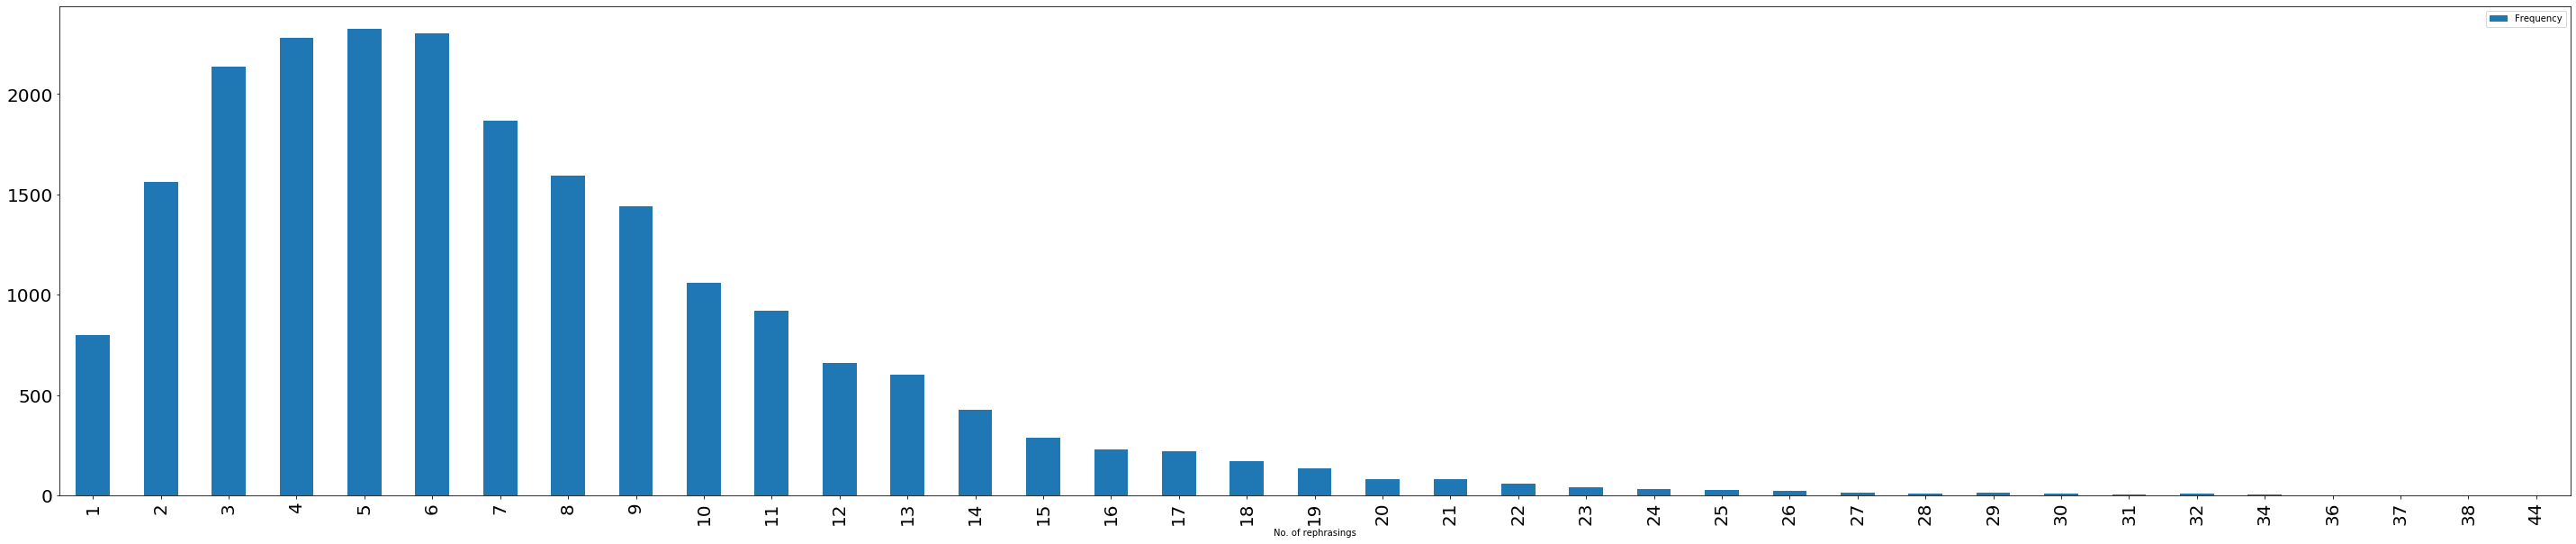

In [52]:
from collections import Counter
counter = dict( Counter(df["unique-thresh-0.95-decontract-True"]))
ditems = counter.items()
sorted_items = sorted(ditems, key=lambda x: x[0])
num_rephrasings, freqs = zip(*sorted_items)
plt_df = pd.DataFrame({'No. of rephrasings':num_rephrasings, 'Frequency':freqs})
ax = plt_df.plot.bar(y='Frequency', x='No. of rephrasings', rot=90,
                     figsize=[50, 10], fontsize=20)


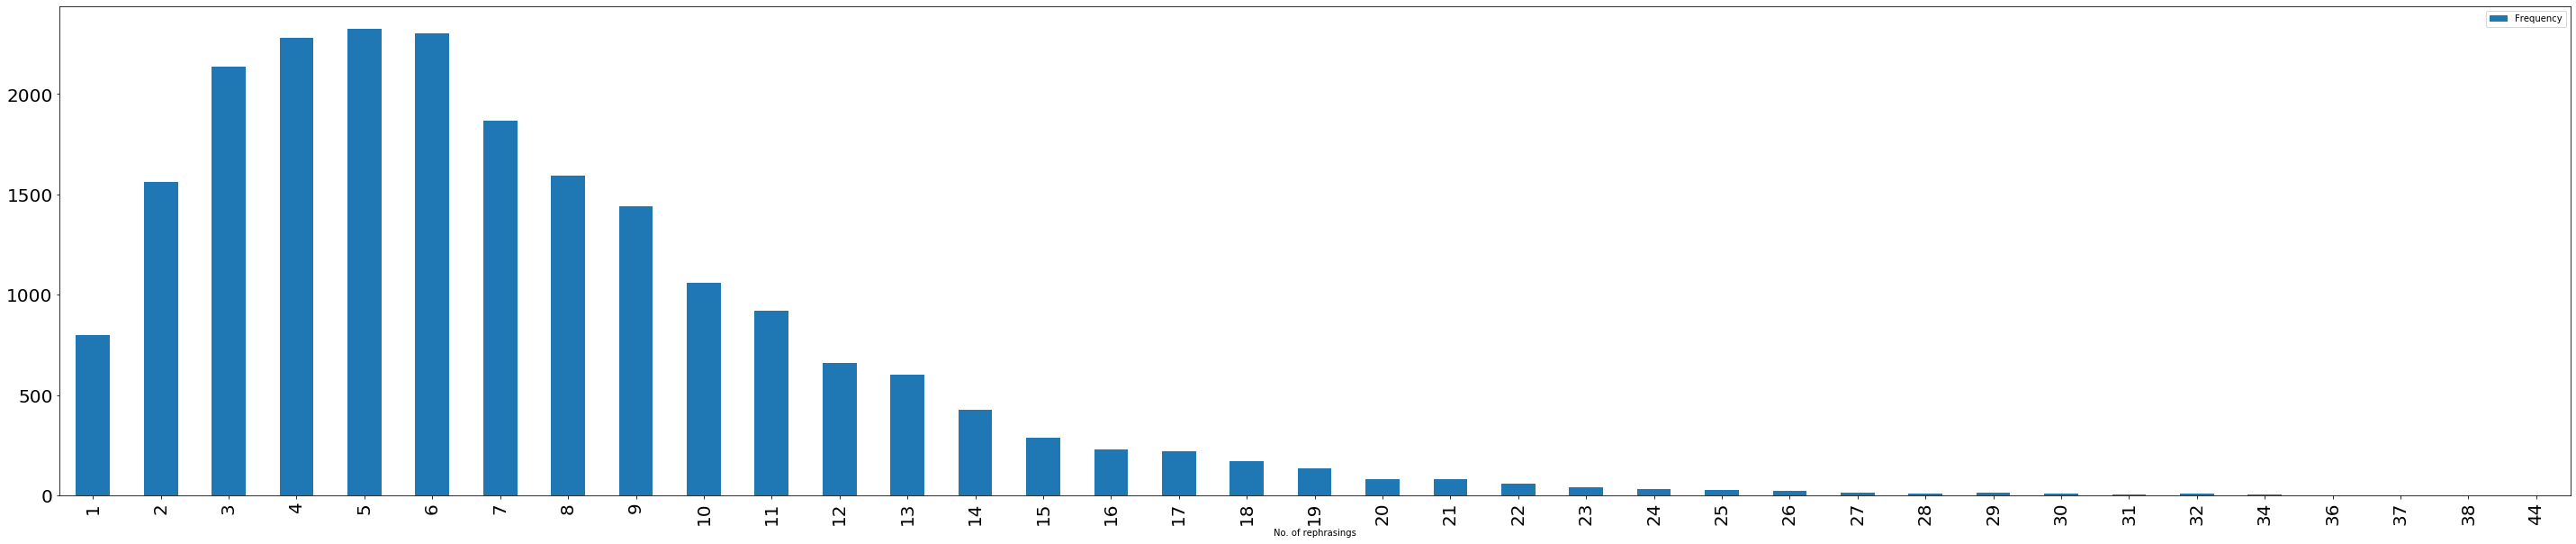

In [57]:
from collections import Counter
counter = dict( Counter(df["unique-thresh-0.95-decontract-False"]))
ditems = counter.items()
sorted_items = sorted(ditems, key=lambda x: x[0])
num_rephrasings, freqs = zip(*sorted_items)
plt_df = pd.DataFrame({'No. of rephrasings':num_rephrasings, 'Frequency':freqs})
ax = plt_df.plot.bar(y='Frequency', x='No. of rephrasings', rot=90,
                     figsize=[50, 10], fontsize=20)


In [58]:
df

,question_id,unique-thresh-0.95-decontract-True,unique-thresh-0.95-decontract-False
0,262148000,3,3
1,262148001,3,3
2,262148002,2,2
3,393225000,3,3
4,393225001,6,6
...,...,...,...
21431,536000002,3,3
21432,536000003,6,6
21433,404931000,8,8
21434,404931001,12,12


In [60]:
all(df["unique-thresh-0.95-decontract-True"] == df["unique-thresh-0.95-decontract-False"])

True